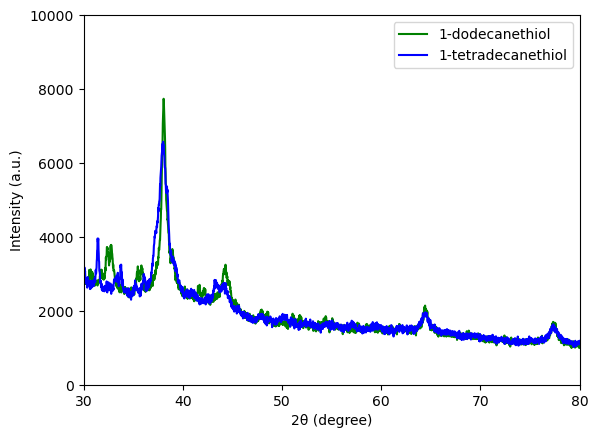

2θ at each peaks for C10:
38.06 44.3 64.42 77.32
2θ at each peaks for C14:
38.0 43.2 64.44 77.3


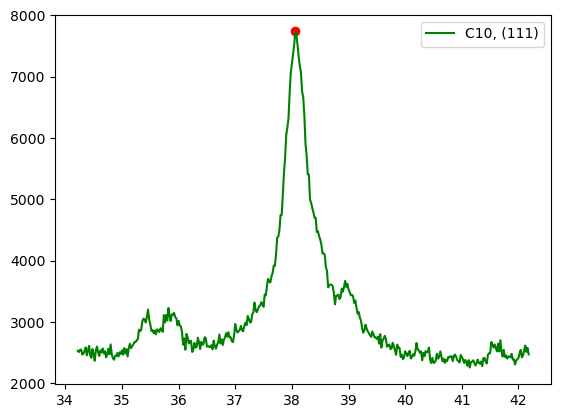

Maximum of the peak for C10: 7737.0
Half maximum of the peak for C10: 3868.5
FWHM for C10: 0.9369117647058829

Calculated crystal size for C10: 1.5043218739934225


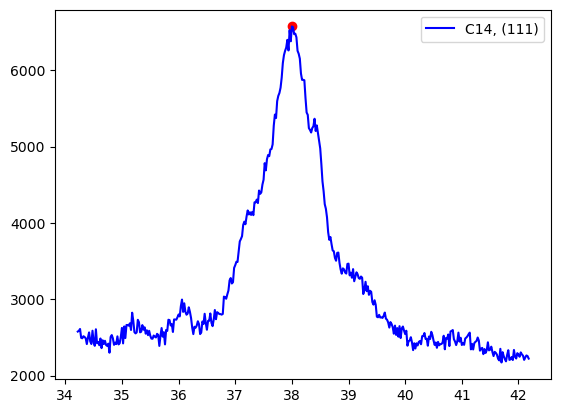


Maximum of the peak for C14: 6574
Half maximum of the peak for C14: 3287.0
FWHM for C14: 2.2678581560283746

Calculated NP size for C10: 1.5043218739934225
Calculated NP size for C14: 0.6183693837359173


In [3]:
import pandas as pd
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import math as m

C10w=pd.read_csv("XRD C10.csv")
C10x=np.array(C10w["Angle"])
C10y=np.array(C10w["Intensity"])

C14w=pd.read_csv("XRD C14.csv")
C14x=np.array(C14w["Angle"])
C14y=np.array(C14w["Intensity"])

plt.plot(C10x,C10y,'g',label="1-dodecanethiol")
plt.plot(C14x,C14y,'b',label="1-tetradecanethiol")  #C6:1-hexanethiol
plt.xlim(30,80)
plt.ylim(0,10000)
plt.xlabel("2θ (degree)")
plt.ylabel("Intensity (a.u.)")
plt.legend()
plt.show()




# Ag NPs: 38.2 / 44.5 / 64.4 / 77.5

# Find exact 2θ point from peaks

x1=[]
y1=[]
x2=[]
y2=[]
x3=[]
y3=[]
x4=[]
y4=[]
for i in range(len(C10x)):
    if C10x[i]>34.2 and C10x[i]<42.2:
        x1.append(C10x[i])
        y1.append(C10y[i])
    if C10x[i]>42.5 and C10x[i]<46.5:
        x2.append(C10x[i])
        y2.append(C10y[i])
    if C10x[i]>62.4 and C10x[i]<66.4:
        x3.append(C10x[i])
        y3.append(C10y[i])
    if C10x[i]>75.5 and C10x[i]<79.5:
        x4.append(C10x[i])
        y4.append(C10y[i])
        
x11=np.array(x1)
y11=np.array(y1)
x22=np.array(x2)
y22=np.array(y2)
x33=np.array(x3)
y33=np.array(y3)
x44=np.array(x4)
y44=np.array(y4)

y11m=np.max(y11)
x11m=x11[np.argmax(y11)]
y22m=np.max(y22)
x22m=x22[np.argmax(y22)]
y33m=np.max(y33)
x33m=x33[np.argmax(y33)]
y44m=np.max(y44)
x44m=x44[np.argmax(y44)]

print("2θ at each peaks for C10:")
print(x11m,x22m,x33m,x44m)


x5=[]
y5=[]
x6=[]
y6=[]
x7=[]
y7=[]
x8=[]
y8=[]
for i in range(len(C14x)):
    if C14x[i]>34.2 and C14x[i]<42.2:
        x5.append(C14x[i])
        y5.append(C14y[i])
    if C14x[i]>42.5 and C14x[i]<46.5:
        x6.append(C14x[i])
        y6.append(C14y[i])
    if C14x[i]>62.4 and C14x[i]<66.4:
        x7.append(C14x[i])
        y7.append(C14y[i])
    if C14x[i]>75.5 and C14x[i]<79.5:
        x8.append(C14x[i])
        y8.append(C14y[i])
        
x55=np.array(x5)
y55=np.array(y5)
x66=np.array(x6)
y66=np.array(y6)
x77=np.array(x7)
y77=np.array(y7)
x88=np.array(x8)
y88=np.array(y8)

y55m=np.max(y55)
x55m=x55[np.argmax(y55)]
y66m=np.max(y66)
x66m=x66[np.argmax(y66)]
y77m=np.max(y77)
x77m=x77[np.argmax(y77)]
y88m=np.max(y88)
x88m=x88[np.argmax(y88)]

print("2θ at each peaks for C14:")
print(x55m,x66m,x77m,x88m)


plt.plot(x11,y11,'g',label="C10, (111)")
plt.scatter(x11m,y11m,c='r')
plt.legend()
plt.show()


halfy1m=0.5*y11m

for i in range(np.argmax(y11),0,-1):
    if y11[i]>halfy1m and y11[i-1]<halfy1m:
        interpx1=x11[i-1]+(x11[i]-x11[i-1])/(y11[i]-y11[i-1])*(halfy1m-y11[i-1])

for i in range(np.argmax(y11),len(y11)-1):
    if y11[i]>halfy1m and y11[i+1]<halfy1m:
        interpx2=x11[i]+(x11[i+1]-x11[i])/(y11[i+1]-y11[i])*(halfy1m-y11[i])

FWHM1=interpx2-interpx1

print(f'Maximum of the peak for C10: {y11m}')
print(f'Half maximum of the peak for C10: {halfy1m}')
print(f'FWHM for C10: {FWHM1}')


k=0.9
w=1.540593
size1=k*w/(FWHM1*m.cos(0.5*x11m))


print(f'\nCalculated crystal size for C10: {size1}')



##

plt.plot(x55,y55,'b',label="C14, (111)")
plt.scatter(x55m,y55m,c='r')
plt.legend()
plt.show()




halfy5m=0.5*y55m


for i in range(np.argmax(y55),0,-1):
    if y55[i]>=halfy5m and y55[i-1]<=halfy5m:
        interpx3=x55[i-1]+(x55[i]-x55[i-1])/(y55[i]-y55[i-1])*(halfy5m-y55[i-1])

for i in range(np.argmax(y55),len(y55)-1):
    if y55[i]>=halfy5m and y55[i+1]<=halfy5m:
        interpx4=x55[i]+(x55[i+1]-x55[i])/(y55[i+1]-y55[i])*(halfy5m-y55[i])

FWHM2=interpx4-interpx3

print(f'\nMaximum of the peak for C14: {y55m}')
print(f'Half maximum of the peak for C14: {halfy5m}')
print(f'FWHM for C14: {FWHM2}')




k=0.9
w=1.540593
size1=k*w/(FWHM1*m.cos(0.5*x11m))
size2=k*w/(FWHM2*m.cos(0.5*x55m))

print(f'\nCalculated NP size for C10: {size1}')
print(f'Calculated NP size for C14: {size2}')

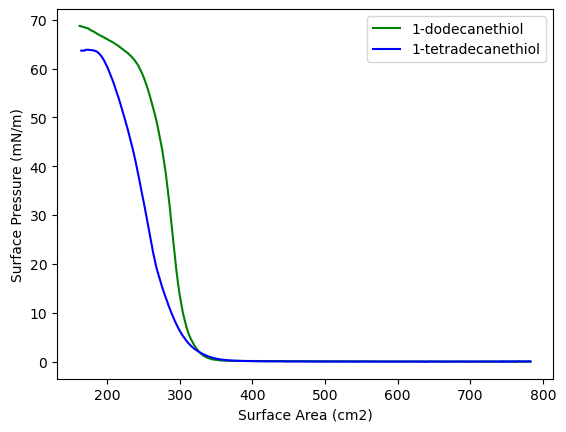

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C10w=pd.read_csv("Ag C10 4000microL Mar20.csv")
C10x=C10w["A[cm²]"]
C10y=C10w["P1[mN/m]"]

C14w=pd.read_csv("Ag C14 2000microL mar13.csv")
C14x=C14w["A[cm²]"]
C14y=C14w["P1[mN/m]"]

plt.plot(C10x,C10y,'g',label="1-dodecanethiol")
plt.plot(C14x,C14y,'b',label="1-tetradecanethiol")
plt.xlabel("Surface Area (cm2)")
plt.ylabel("Surface Pressure (mN/m)")
plt.legend()
plt.show()

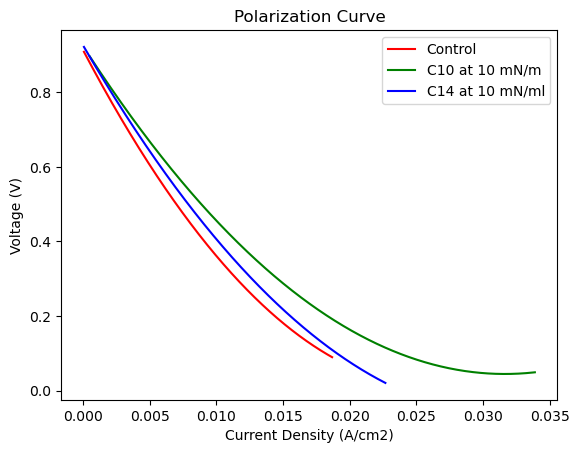

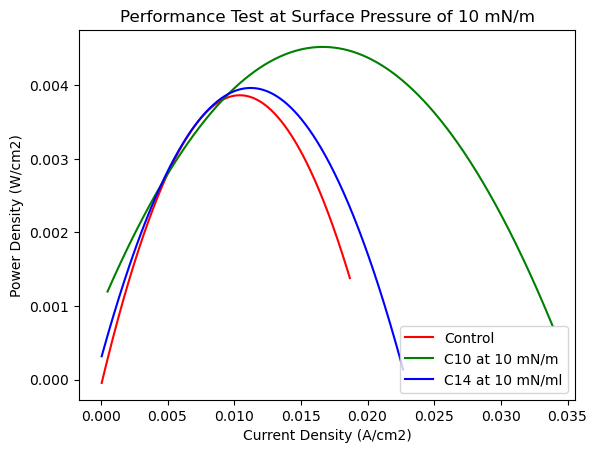

Percentage enhancement by C10: 33.33333333333334%
Percentage enhancement by C14: 33.33333333333334%


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

Control=pd.read_excel("Nafion117_80sccm.xlsx")
C10_2=pd.read_excel("Nafion117c10_ag_10mN_80sccm.xlsx")
C14_2=pd.read_excel("Nafion117c14_ag_10mN_80sccm.xlsx")

control=np.array(Control)
conV=[sublist[0] for sublist in control]
conA=[sublist[1] for sublist in control]
conW=[sublist[2] for sublist in control]
c102=np.array(C10_2)
conV102=[sublist[0] for sublist in c102]
conA102=[sublist[1] for sublist in c102]
conW102=[sublist[2] for sublist in c102]
c142=np.array(C14_2)
conV142=[sublist[0] for sublist in c142]
conA142=[sublist[1] for sublist in c142]
conW142=[sublist[2] for sublist in c142]


conAd= [x/16 for x in conA]
conWd= [x/16 for x in conW]
conAd102= [x/16 for x in conA102]
conWd102= [x/16 for x in conW102]
conAd142= [x/16 for x in conA142]
conWd142= [x/16 for x in conW142]

f1 = np.poly1d(np.polyfit(conAd, conV, deg=2))
xmodel1=np.linspace(min(conAd),max(conAd),1000)
ymodel1=f1(xmodel1)
f2 = np.poly1d(np.polyfit(conAd102, conV102, deg=2))
xmodel2=np.linspace(min(conAd102),max(conAd102),1000)
ymodel2=f2(xmodel2)
f3 = np.poly1d(np.polyfit(conAd142, conV142, deg=2))
xmodel3=np.linspace(min(conAd142),max(conAd142),1000)
ymodel3=f3(xmodel3)


plt.plot(xmodel1,ymodel1,'r',label='Control')
plt.plot(xmodel2,ymodel2,'g',label='C10 at 10 mN/m')
plt.plot(xmodel3,ymodel3,'b',label='C14 at 10 mN/ml')
plt.xlabel("Current Density (A/cm2)")
plt.ylabel("Voltage (V)")
plt.title("Polarization Curve")
plt.legend()
plt.show()


##################################################################

f4 = np.poly1d(np.polyfit(conAd, conWd, deg=2))
xmodel4=np.linspace(min(conAd),max(conAd),1000)
ymodel4=f4(xmodel4)
f5 = np.poly1d(np.polyfit(conAd102, conWd102, deg=2))
xmodel5=np.linspace(min(conAd102),max(conAd102),1000)
ymodel5=f5(xmodel5)
f6 = np.poly1d(np.polyfit(conAd142, conWd142, deg=2))
xmodel6=np.linspace(min(conAd142),max(conAd142),1000)
ymodel6=f6(xmodel6)

plt.plot(xmodel4,ymodel4,'r',label='Control')
plt.plot(xmodel5,ymodel5,'g',label='C10 at 10 mN/m')
plt.plot(xmodel6,ymodel6,'b',label='C14 at 10 mN/ml')
plt.xlabel("Current Density (A/cm2)")
plt.ylabel("Power Density (W/cm2)")
plt.title("Performance Test at Surface Pressure of 10 mN/m")
plt.legend()
plt.show()


maxconW=max(conWd)
max10W=max(conWd102)
max14W=max(conWd142)

enhance10=(max10W-maxconW)/maxconW*100
enhance14=(max14W-maxconW)/maxconW*100

print(f'Percentage enhancement by C10: {enhance10}%')
print(f'Percentage enhancement by C14: {enhance14}%')
